In [280]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [281]:
df = pd.read_csv('https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv')

df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Exhaustive Feature Selection

In [282]:
lr = LogisticRegression()

sel = EFS(lr, max_features=4, scoring='accuracy', cv=5)

In [283]:
model = sel.fit(df.iloc[:, :4], df['species'])

C:\Users\ACER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
Features: 15/15

In [284]:
model.best_score_

0.9733333333333334

In [285]:
model.best_feature_names_

('sepal_length', 'sepal_width', 'petal_length', 'petal_width')

In [286]:
# Detailed Output

model.subsets_

{0: {'feature_idx': (0,),
  'cv_scores': array([0.66666667, 0.73333333, 0.76666667, 0.76666667, 0.83333333]),
  'avg_score': 0.7533333333333333,
  'feature_names': ('sepal_length',)},
 1: {'feature_idx': (1,),
  'cv_scores': array([0.53333333, 0.56666667, 0.53333333, 0.53333333, 0.63333333]),
  'avg_score': 0.5599999999999999,
  'feature_names': ('sepal_width',)},
 2: {'feature_idx': (2,),
  'cv_scores': array([0.93333333, 1.        , 0.9       , 0.93333333, 1.        ]),
  'avg_score': 0.9533333333333334,
  'feature_names': ('petal_length',)},
 3: {'feature_idx': (3,),
  'cv_scores': array([1.        , 0.96666667, 0.9       , 0.93333333, 1.        ]),
  'avg_score': 0.96,
  'feature_names': ('petal_width',)},
 4: {'feature_idx': (0, 1),
  'cv_scores': array([0.73333333, 0.83333333, 0.76666667, 0.86666667, 0.9       ]),
  'avg_score': 0.8200000000000001,
  'feature_names': ('sepal_length', 'sepal_width')},
 5: {'feature_idx': (0, 2),
  'cv_scores': array([0.93333333, 1.        , 0.9   

In [287]:
metric_df = pd.DataFrame.from_dict(model.get_metric_dict()).T
metric_df

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
0,"(0,)","[0.6666666666666666, 0.7333333333333333, 0.766...",0.753333,"(sepal_length,)",0.069612,0.05416,0.02708
1,"(1,)","[0.5333333333333333, 0.5666666666666667, 0.533...",0.56,"(sepal_width,)",0.049963,0.038873,0.019437
2,"(2,)","[0.9333333333333333, 1.0, 0.9, 0.9333333333333...",0.953333,"(petal_length,)",0.051412,0.04,0.02
3,"(3,)","[1.0, 0.9666666666666667, 0.9, 0.9333333333333...",0.96,"(petal_width,)",0.049963,0.038873,0.019437
4,"(0, 1)","[0.7333333333333333, 0.8333333333333334, 0.766...",0.82,"(sepal_length, sepal_width)",0.079462,0.061824,0.030912
5,"(0, 2)","[0.9333333333333333, 1.0, 0.9, 0.9333333333333...",0.953333,"(sepal_length, petal_length)",0.051412,0.04,0.02
6,"(0, 3)","[0.9333333333333333, 0.9666666666666667, 0.933...",0.953333,"(sepal_length, petal_width)",0.034274,0.026667,0.013333
7,"(1, 2)","[0.9333333333333333, 1.0, 0.9, 0.9333333333333...",0.953333,"(sepal_width, petal_length)",0.051412,0.04,0.02
8,"(1, 3)","[0.9333333333333333, 0.9666666666666667, 0.9, ...",0.94,"(sepal_width, petal_width)",0.032061,0.024944,0.012472
9,"(2, 3)","[0.9666666666666667, 0.9666666666666667, 0.933...",0.96,"(petal_length, petal_width)",0.032061,0.024944,0.012472


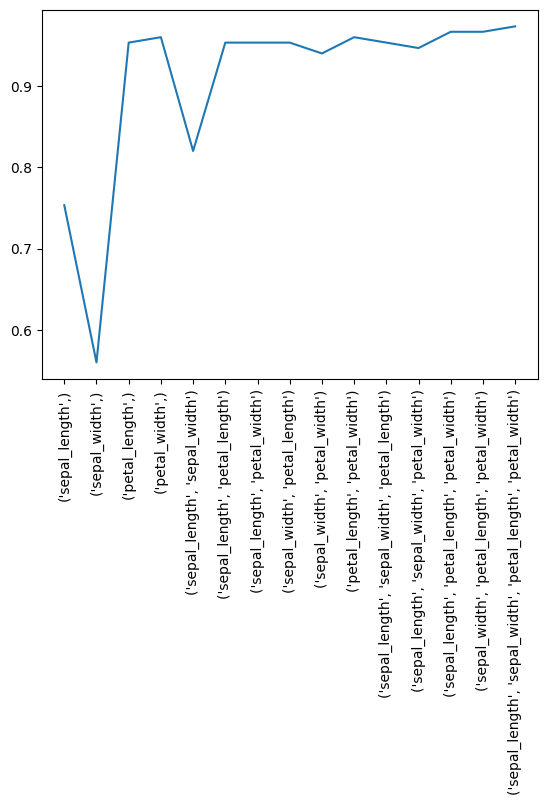

In [288]:
plt.plot([str(k) for k in metric_df['feature_names']], metric_df['avg_score'])
plt.xticks(rotation=90)
plt.show()

### Regression Example

In [289]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')

df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [290]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df['medv'], test_size=0.2, random_state=42)

In [291]:
print(X_train.shape)
print(X_test.shape)

(404, 13)
(102, 13)


In [292]:
X_train.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
477,15.02340,0.0,18.10,0,0.6140,5.304,97.3,2.1007,24,666,20.2,349.48,24.91
15,0.62739,0.0,8.14,0,0.5380,5.834,56.5,4.4986,4,307,21.0,395.62,8.47
332,0.03466,35.0,6.06,0,0.4379,6.031,23.3,6.6407,1,304,16.9,362.25,7.83
423,7.05042,0.0,18.10,0,0.6140,6.103,85.1,2.0218,24,666,20.2,2.52,23.29
19,0.72580,0.0,8.14,0,0.5380,5.727,69.5,3.7965,4,307,21.0,390.95,11.28


In [293]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [294]:
# Baseline Model

model = LinearRegression()

print("Training", np.mean(cross_val_score(model, X_train, y_train, cv=5, scoring='r2')))
print("Testing", np.mean(cross_val_score(model, X_test, y_test, cv=5, scoring='r2')))

Training 0.724435734224026
Testing 0.5451790940964925


In [295]:
lr = LinearRegression()

exh = EFS(lr, max_features=13, scoring='r2', cv=10, print_progress=True, n_jobs=-1)

sel = exh.fit(X_train, y_train)

Features: 8191/8191

In [296]:
sel.best_score_

0.7021432332186084

In [297]:
sel.best_feature_names_

('0', '3', '4', '5', '7', '8', '9', '10', '11', '12')

In [298]:
metric_df = pd.DataFrame.from_dict(sel.get_metric_dict()).T

metric_df

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
0,"(0,)","[0.06187201349312821, 0.21695752952290703, 0.1...",0.1113,"(0,)",0.068626,0.092399,0.0308
1,"(1,)","[-0.06909411223332595, 0.06378364489046917, 0....",0.080141,"(1,)",0.043549,0.058635,0.019545
2,"(2,)","[0.2581400495130045, 0.24192652096087108, 0.15...",0.197438,"(2,)",0.056161,0.075616,0.025205
3,"(3,)","[-0.06519180407233627, -0.11570770910402528, 0...",0.002908,"(3,)",0.057893,0.077949,0.025983
4,"(4,)","[0.18831320204786572, 0.15611671149828166, 0.1...",0.15303,"(4,)",0.053874,0.072536,0.024179
...,...,...,...,...,...,...,...
8186,"(0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12)","[0.7903768760758775, 0.7978748201943937, 0.742...",0.698955,"(0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12)",0.110196,0.14837,0.049457
8187,"(0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)","[0.7793809319729096, 0.7920049721169651, 0.753...",0.699647,"(0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)",0.115985,0.156164,0.052055
8188,"(0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)","[0.7802485152933576, 0.8031632921683025, 0.754...",0.698545,"(0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)",0.117601,0.15834,0.05278
8189,"(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)","[0.7851529306013899, 0.7726604948432467, 0.749...",0.69279,"(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)",0.116607,0.157001,0.052334


In [299]:
def adjusted_r2(r2, num_examples, num_features):
    coef = (num_examples - 1) / (num_examples - num_features - 1)
    return 1 - (1 - r2) * coef

In [300]:
metric_df['observations'] = 404
metric_df['num_features'] = metric_df['feature_idx'].apply(lambda x:len(x))
metric_df['adjusted_r2'] = adjusted_r2(metric_df['avg_score'], metric_df['observations'], metric_df['num_features'])

In [301]:
metric_df.sort_values('adjusted_r2', ascending=False)

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err,observations,num_features,adjusted_r2
7590,"(0, 4, 5, 7, 8, 9, 10, 11, 12)","[0.7948781300135748, 0.8126032997049035, 0.740...",0.701604,"(0, 4, 5, 7, 8, 9, 10, 11, 12)",0.109782,0.147812,0.049271,404,9,0.694787
8029,"(0, 3, 4, 5, 7, 8, 9, 10, 11, 12)","[0.7853673828678086, 0.8068527620446221, 0.753...",0.702143,"(0, 3, 4, 5, 7, 8, 9, 10, 11, 12)",0.115758,0.155859,0.051953,404,10,0.694564
7975,"(0, 1, 4, 5, 7, 8, 9, 10, 11, 12)","[0.7916866437250346, 0.8002117305356403, 0.740...",0.701376,"(0, 1, 4, 5, 7, 8, 9, 10, 11, 12)",0.108014,0.145431,0.048477,404,10,0.693777
8150,"(0, 1, 3, 4, 5, 7, 8, 9, 10, 11, 12)","[0.7824493530648429, 0.7949109285480953, 0.753...",0.702035,"(0, 1, 3, 4, 5, 7, 8, 9, 10, 11, 12)",0.114302,0.153898,0.051299,404,11,0.693673
7566,"(0, 3, 4, 5, 7, 8, 10, 11, 12)","[0.7682279280336335, 0.8030267188370753, 0.762...",0.700389,"(0, 3, 4, 5, 7, 8, 10, 11, 12)",0.119573,0.160996,0.053665,404,9,0.693545
...,...,...,...,...,...,...,...,...,...,...
1,"(1,)","[-0.06909411223332595, 0.06378364489046917, 0....",0.080141,"(1,)",0.043549,0.058635,0.019545,404,1,0.077853
30,"(1, 7)","[-0.06763615312808446, 0.06933915753701958, 0....",0.077769,"(1, 7)",0.043101,0.058032,0.019344,404,2,0.07317
49,"(3, 7)","[-0.050810320515409346, -0.042849300889358455,...",0.065037,"(3, 7)",0.066554,0.089609,0.02987,404,2,0.060374
7,"(7,)","[-0.020714728360076817, 0.06907241897075367, 0...",0.036859,"(7,)",0.036497,0.04914,0.01638,404,1,0.034463


In [302]:
X_train_sel = sel.transform(X_train)
X_test_sel = sel.transform(X_test)

In [303]:
model = LinearRegression()

print("Training", np.mean(cross_val_score(model, X_train_sel, y_train, cv=5, scoring='r2')))
print("Testing", np.mean(cross_val_score(model, X_test_sel, y_test, cv=5, scoring='r2')))

Training 0.7261221606129598
Testing 0.5246730606335532


### Sequential Feature Selection/Elimination

In [304]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

# Load the Dataset
data = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')

# Separate the Target Variable
X = data.drop('medv', axis=1)
y = data['medv']

# Split the Data into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

print(X_train.shape)

(404, 13)


In [305]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [306]:
model = LinearRegression()

print('Training', np.mean(cross_val_score(model, X_train, y_train, cv=5, scoring='r2')))
print('Testing', np.mean(cross_val_score(model, X_test, y_test, cv=5, scoring='r2')))

Training 0.7025123301096213
Testing 0.6514899901155404


In [307]:
lr = LinearRegression()

# Performing Backward Elimination
sfs = SFS(lr, k_features='best', forward=False, floating=False, scoring='r2', cv=5)

sfs.fit(X_train, y_train)

SequentialFeatureSelector(estimator=LinearRegression(), forward=False,
                          k_features=(1, 13), scoring='r2')

In [308]:
sfs.k_feature_idx_

(0, 1, 4, 5, 7, 8, 9, 10, 11, 12)

In [309]:
metric_df = pd.DataFrame.from_dict(sfs.get_metric_dict()).T

metric_df['observations'] = 404
metric_df['num_features'] = metric_df['feature_idx'].apply(lambda x:len(x))
metric_df['adjusted_r2'] = adjusted_r2(metric_df['avg_score'], metric_df['observations'], metric_df['num_features'])

metric_df

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err,observations,num_features,adjusted_r2
13,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)","[0.7535027170817178, 0.6920238509138777, 0.682...",0.702512,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)",0.038207,0.029727,0.014863,404,13,0.692596
12,"(0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12)","[0.7532855958710695, 0.6944570477695307, 0.693...",0.70581,"(0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12)",0.035641,0.02773,0.013865,404,12,0.696781
11,"(0, 1, 3, 4, 5, 7, 8, 9, 10, 11, 12)","[0.754710892556849, 0.6959627893665097, 0.7017...",0.708109,"(0, 1, 3, 4, 5, 7, 8, 9, 10, 11, 12)",0.035367,0.027516,0.013758,404,11,0.699918
10,"(0, 1, 4, 5, 7, 8, 9, 10, 11, 12)","[0.7769593921905563, 0.6884741223718953, 0.702...",0.710033,"(0, 1, 4, 5, 7, 8, 9, 10, 11, 12)",0.046075,0.035848,0.017924,404,10,0.702654
9,"(0, 1, 4, 5, 7, 8, 9, 10, 12)","[0.7706104220711025, 0.6854023389684323, 0.690...",0.704324,"(0, 1, 4, 5, 7, 8, 9, 10, 12)",0.046449,0.036139,0.018069,404,9,0.69757
8,"(0, 1, 4, 5, 7, 8, 10, 12)","[0.7681719744800458, 0.6822126526818693, 0.670...",0.697727,"(0, 1, 4, 5, 7, 8, 10, 12)",0.04882,0.037984,0.018992,404,8,0.691605
7,"(0, 1, 4, 5, 7, 10, 12)","[0.7671638009750725, 0.6812300799626649, 0.661...",0.692234,"(0, 1, 4, 5, 7, 10, 12)",0.051644,0.040181,0.02009,404,7,0.686794
6,"(1, 4, 5, 7, 10, 12)","[0.7519120213497091, 0.6756087674652564, 0.646...",0.686004,"(1, 4, 5, 7, 10, 12)",0.046845,0.036447,0.018224,404,6,0.681258
5,"(4, 5, 7, 10, 12)","[0.7525552802357769, 0.6665033988504306, 0.639...",0.681065,"(4, 5, 7, 10, 12)",0.051233,0.039861,0.019931,404,5,0.677058
4,"(5, 7, 10, 12)","[0.7384743962575444, 0.640118850766883, 0.5873...",0.662544,"(5, 7, 10, 12)",0.063384,0.049315,0.024658,404,4,0.659161


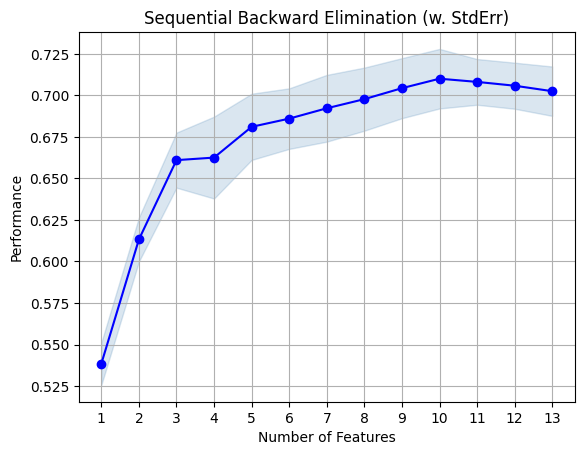

In [310]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_err')

plt.title('Sequential Backward Elimination (w. StdErr)')
plt.grid()
plt.show()

In [311]:
X_train_sel = sfs.transform(X_train)
X_test_sel = sfs.transform(X_test)

model = LinearRegression()

print('Training', np.mean(cross_val_score(model, X_train_sel, y_train, cv=5, scoring='r2')))
print('Testing', np.mean(cross_val_score(model, X_test_sel, y_test, cv=5, scoring='r2')))

Training 0.7100327839218562
Testing 0.7205819296124483


In [312]:
X_train_sel.shape

(404, 10)

### Sequential Forward Selection

In [313]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

# Load the Dataset
data = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')

# Separate the Target Variable
X = data.drop('medv', axis=1)
y = data['medv']

# Split the Data into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

print(X_train.shape)

(404, 13)


In [314]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [315]:
model = LinearRegression()

print('Training', np.mean(cross_val_score(model, X_train, y_train, cv=5, scoring='r2')))
print('Testing', np.mean(cross_val_score(model, X_test, y_test, cv=5, scoring='r2')))

Training 0.7025123301096213
Testing 0.6514899901155404


In [316]:
lr = LinearRegression()

# Performing Forward Selection
sfs = SFS(lr, k_features='best', forward=True, floating=False, scoring='r2', cv=5)

sfs.fit(X_train, y_train)

SequentialFeatureSelector(estimator=LinearRegression(), k_features=(1, 13),
                          scoring='r2')

In [317]:
sfs.k_feature_idx_

(0, 1, 4, 5, 7, 8, 9, 10, 11, 12)

In [318]:
metric_df = pd.DataFrame.from_dict(sfs.get_metric_dict()).T

metric_df['observations'] = 404
metric_df['num_features'] = metric_df['feature_idx'].apply(lambda x:len(x))
metric_df['adjusted_r2'] = adjusted_r2(metric_df['avg_score'], metric_df['observations'], metric_df['num_features'])

metric_df

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err,observations,num_features,adjusted_r2
1,"(12,)","[0.5472998394577442, 0.49002001493399727, 0.53...",0.538451,"(12,)",0.032755,0.025485,0.012742,404,1,0.537303
2,"(5, 12)","[0.6330856272904802, 0.5779812120755249, 0.586...",0.613259,"(5, 12)",0.034066,0.026505,0.013252,404,2,0.61133
3,"(5, 10, 12)","[0.7215896884753017, 0.6288372046797153, 0.633...",0.661012,"(5, 10, 12)",0.04259,0.033136,0.016568,404,3,0.65847
4,"(5, 10, 11, 12)","[0.725877216548624, 0.6342604286872173, 0.6558...",0.667383,"(5, 10, 11, 12)",0.039611,0.030819,0.01541,404,4,0.664048
5,"(5, 7, 10, 11, 12)","[0.7440756174774326, 0.6473449858158777, 0.614...",0.671496,"(5, 7, 10, 11, 12)",0.055057,0.042836,0.021418,404,5,0.667369
6,"(4, 5, 7, 10, 11, 12)","[0.7554472741494642, 0.6695521143038103, 0.653...",0.68562,"(4, 5, 7, 10, 11, 12)",0.047626,0.037054,0.018527,404,6,0.680869
7,"(1, 4, 5, 7, 10, 11, 12)","[0.7548843433907461, 0.6798073590310516, 0.662...",0.6913,"(1, 4, 5, 7, 10, 11, 12)",0.042762,0.03327,0.016635,404,7,0.685844
8,"(0, 1, 4, 5, 7, 10, 11, 12)","[0.7678201537729974, 0.6827004362205138, 0.671...",0.695442,"(0, 1, 4, 5, 7, 10, 11, 12)",0.048774,0.037948,0.018974,404,8,0.689274
9,"(0, 1, 4, 5, 7, 8, 10, 11, 12)","[0.7746648196407366, 0.6850585456872307, 0.683...",0.703763,"(0, 1, 4, 5, 7, 8, 10, 11, 12)",0.04762,0.03705,0.018525,404,9,0.696996
10,"(0, 1, 4, 5, 7, 8, 9, 10, 11, 12)","[0.7769593921905563, 0.6884741223718953, 0.702...",0.710033,"(0, 1, 4, 5, 7, 8, 9, 10, 11, 12)",0.046075,0.035848,0.017924,404,10,0.702654


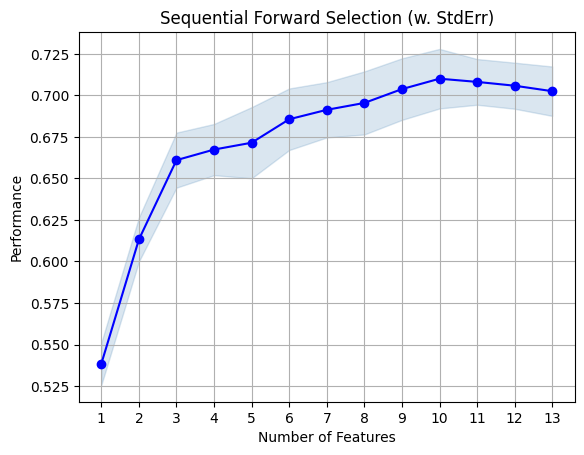

In [319]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_err')

plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

In [320]:
X_train_sel = sfs.transform(X_train)
X_test_sel = sfs.transform(X_test)

model = LinearRegression()

print('Training', np.mean(cross_val_score(model, X_train_sel, y_train, cv=5, scoring='r2')))
print('Testing', np.mean(cross_val_score(model, X_test_sel, y_test, cv=5, scoring='r2')))

Training 0.7100327839218562
Testing 0.7205819296124483


In [321]:
X_train_sel.shape

(404, 10)

### Using SKLearn

In [322]:
from sklearn.feature_selection import SequentialFeatureSelector as SFS 

sfs2 = SFS(
    model,
    n_features_to_select=5,
    direction='forward',
    scoring='r2',
    n_jobs=-1,
    cv=5
)

sfs2 = sfs2.fit(X_train, y_train)

In [323]:
np.arange(X.shape[1])[sfs2.support_]

array([ 5,  7, 10, 11, 12])